In [1]:
# import library
import numpy as np 
import pandas as pd 

In [2]:
# load data
dataset = pd.read_csv('hotel_bookings.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [3]:
# hotel
dataset['hotel'].describe()

count         119390
unique             2
top       City Hotel
freq           79330
Name: hotel, dtype: object

In [4]:
# lead_time
dataset['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [5]:
# arrival_date_year
dataset['arrival_date_year'].describe()

count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64

In [6]:
# arrival_date_month
dataset['arrival_date_month'].describe()

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

In [7]:
# arrival_date_week_number
# dataset['arrival_date_week_number'] = dataset['arrival_date_week_number'].astype(str)
dataset['arrival_date_week_number'].describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

In [8]:
# arrival_date_day_of_month
dataset['arrival_date_day_of_month'].describe()

count    119390.000000
mean         15.798241
std           8.780829
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: arrival_date_day_of_month, dtype: float64

In [9]:
# stays_in_weekend_nights
dataset['stays_in_weekend_nights'].describe()

count    119390.000000
mean          0.927599
std           0.998613
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64

## Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
sns.set(style='darkgrid')

<Figure size 1440x720 with 0 Axes>

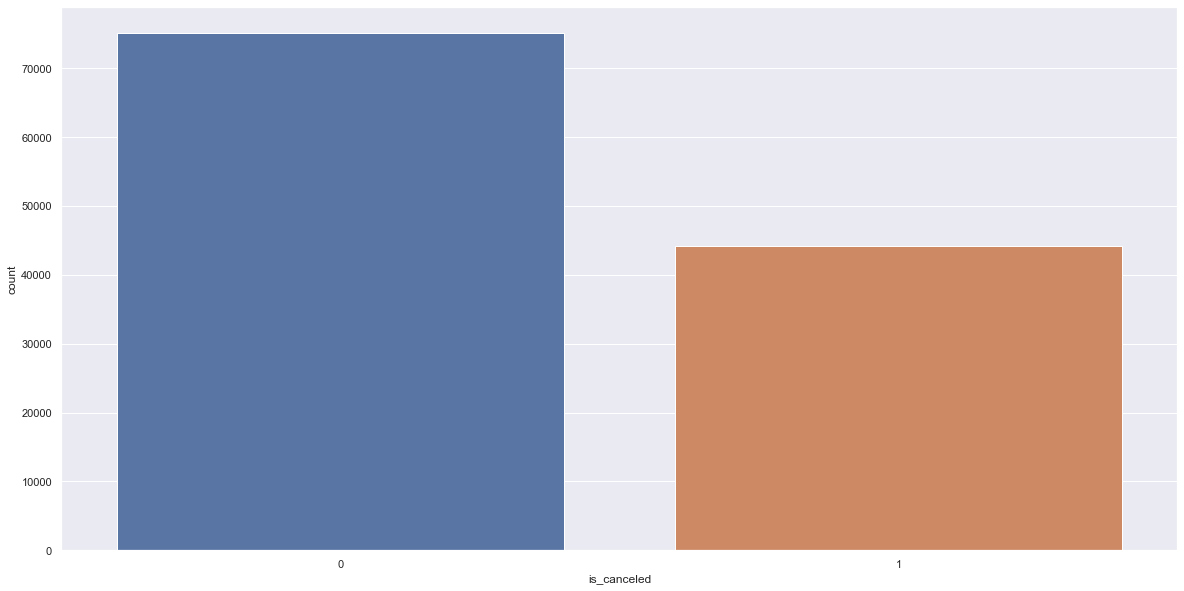

In [11]:
# The label - is_canceled
plt.figure(figsize = (20,10))
sns.countplot(dataset['is_canceled'])

- It seems that the majority of reservations were not canceled

<Figure size 1440x720 with 0 Axes>

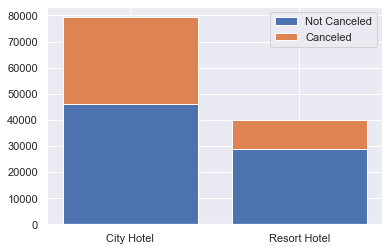

<Figure size 1440x720 with 0 Axes>

In [12]:
# Stacked Bar chart for hotel
plt.figure(figsize = (20,10))

canceled = dataset[dataset.is_canceled==1]['hotel'].value_counts()
not_canceled = dataset[dataset.is_canceled==0]['hotel'].value_counts()

labels = ['City Hotel', 'Resort Hotel']
fig, ax = plt.subplots()
plt.figure(figsize = (20,10))
ax.bar(labels, not_canceled, label='Not Canceled')
ax.bar(labels, canceled, bottom=not_canceled, label='Canceled')

ax.legend()
plt.show()

- City Hotel has more bookings (3/4 of bookings), any maybe that's why it has more cancellations.
- City Hotel has more bookings because it is more affordable
#### Resort Hotel is more appropriate for larger group of customers (family with childern)??  -- need to find out the relation.

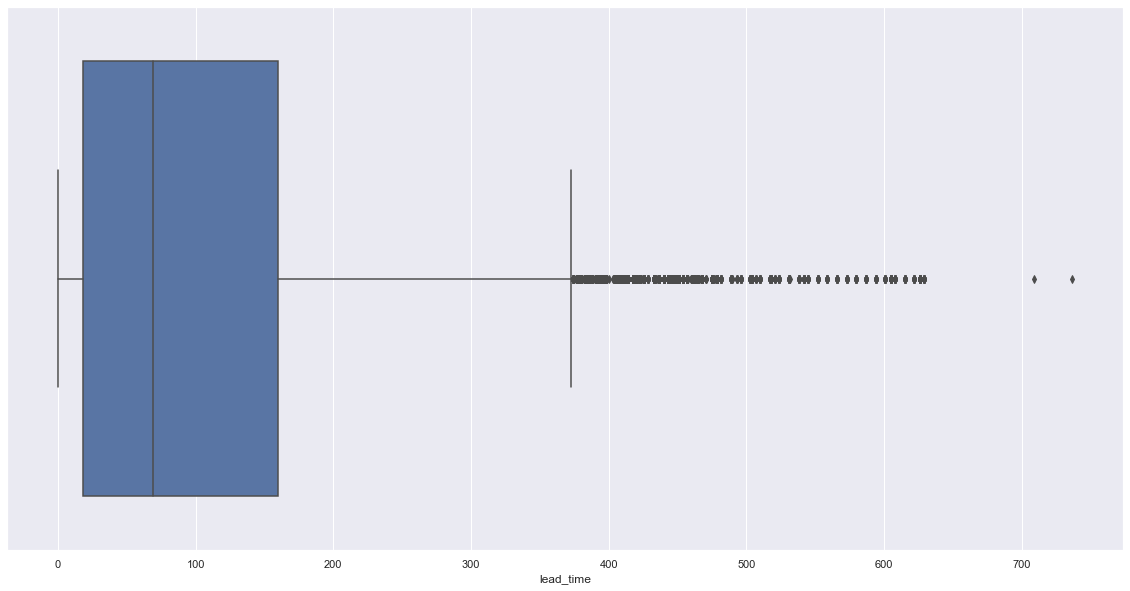

In [13]:
# boxplot for lead time and for lead time
plt.figure(figsize = (20,10))
sns.boxplot(dataset['lead_time'])

- The outliers are those larger than ~370
- The majority are smaller than 200

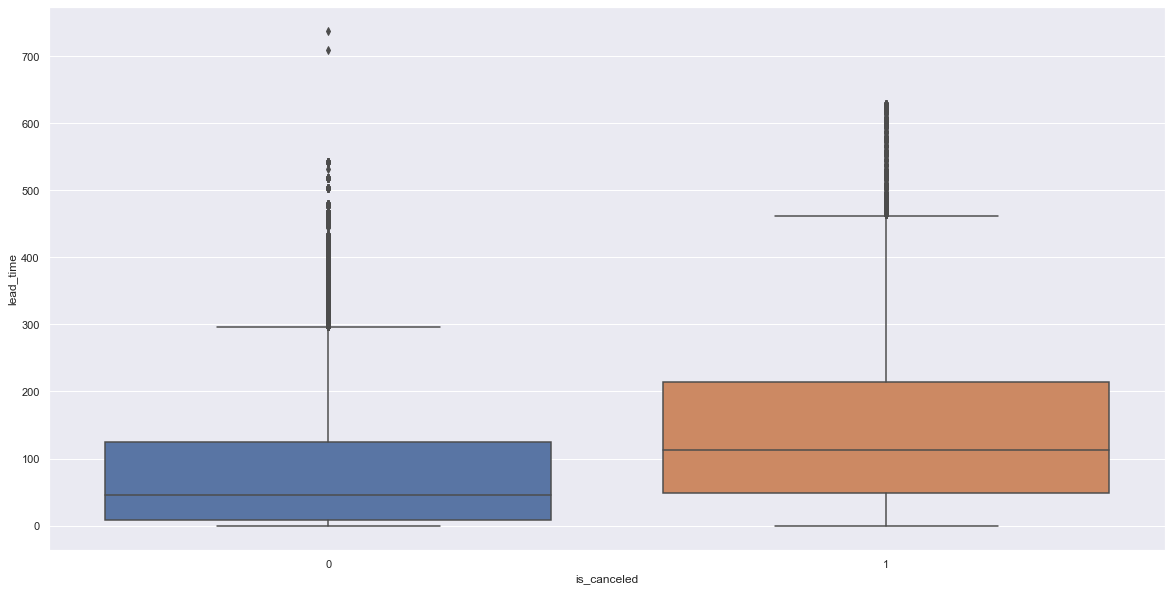

In [14]:
# boxplot for lead time and for lead time reagarding to is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['is_canceled'],y=dataset['lead_time'])

- Bookings tend to be canceled when the lead time is longer

<Figure size 1440x720 with 0 Axes>

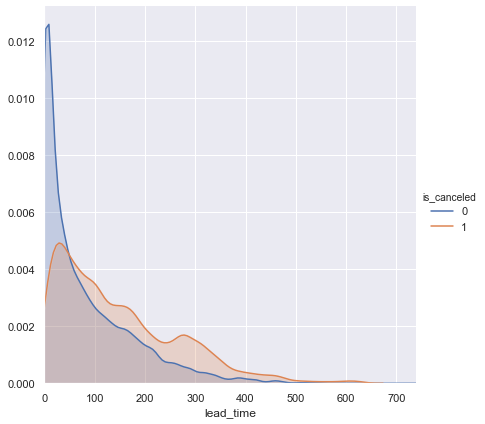

In [15]:
# Density Curve for lead time by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(dataset,hue='is_canceled',height=6,xlim=[0,740]).map(sns.kdeplot,'lead_time',shade=True).add_legend()

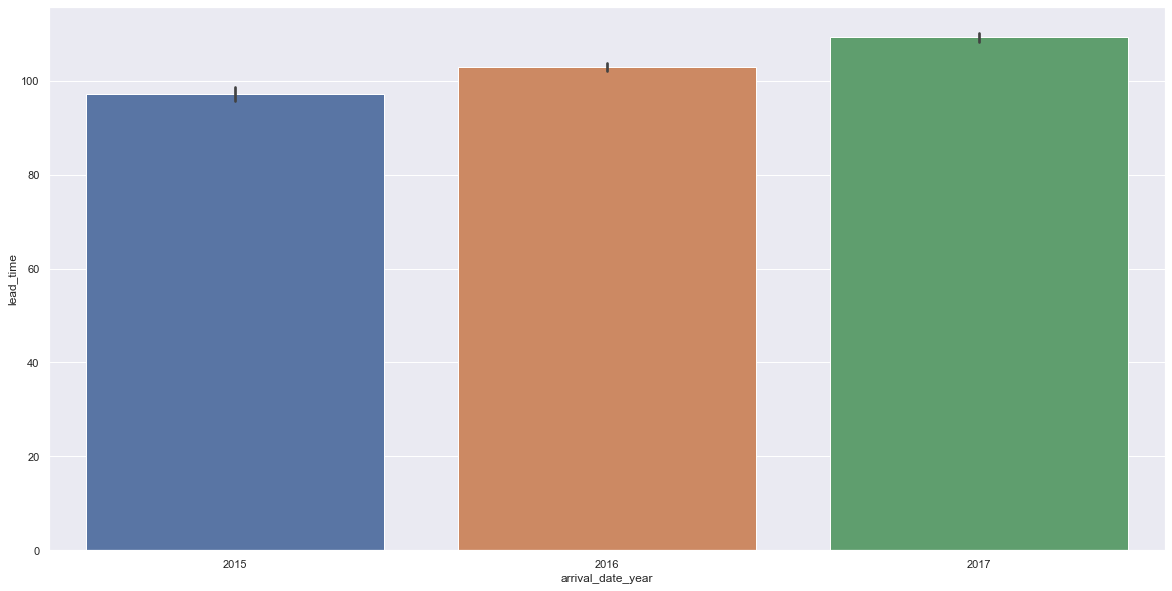

In [16]:
# bar chart for lead time with regard to arrival year
plt.figure(figsize = (20,10))
sns.barplot(x ='arrival_date_year', y = 'lead_time', data = dataset)

- When the lead time is larger than 60, people tend to cancel their bookings

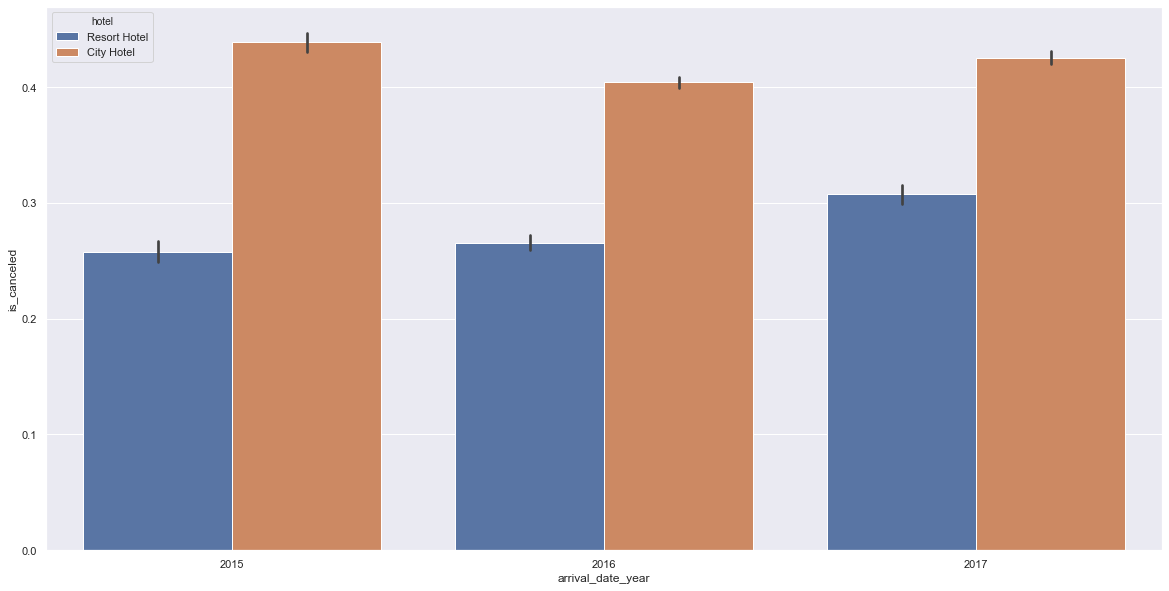

In [17]:
# Stacked Bar chart for arrival year
plt.figure(figsize = (20,10))
sns.barplot(x='arrival_date_year', y='is_canceled', hue='hotel',data=dataset)

- 2016 has more reservations, but the overall cancellation rates among three years are approximately the same

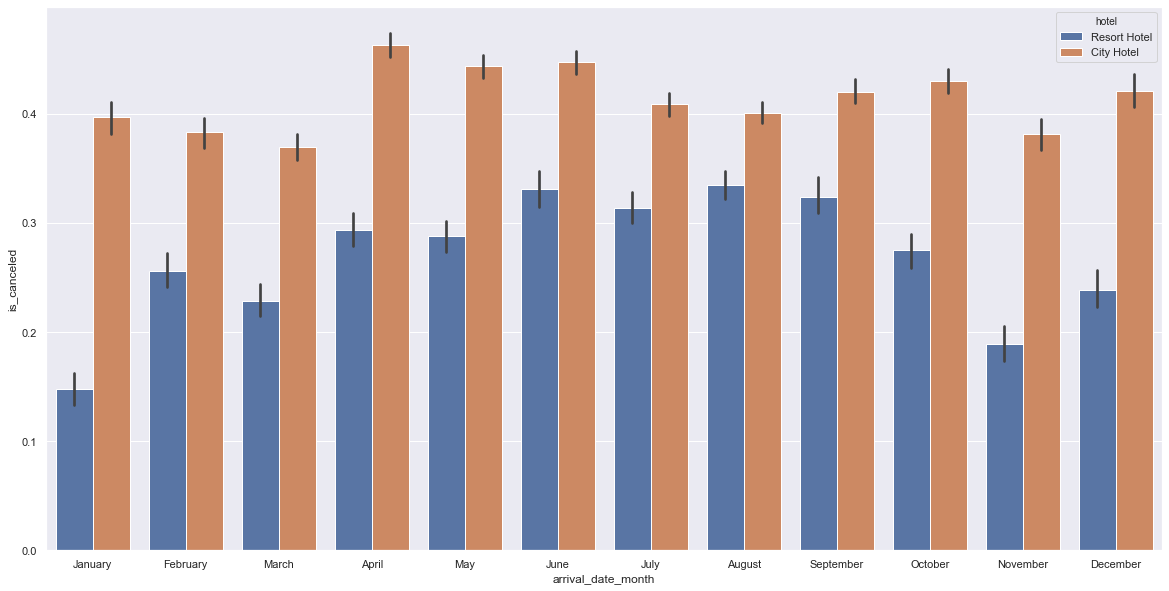

In [18]:
# Bar chart for arrival month
plt.figure(figsize = (20,10))
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
       'August', 'September', 'October', 'November', 'December']
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data=dataset, order=month)

- Increasing more bookings arond the middle of the year (summer period is the peak)

<Figure size 1440x720 with 0 Axes>

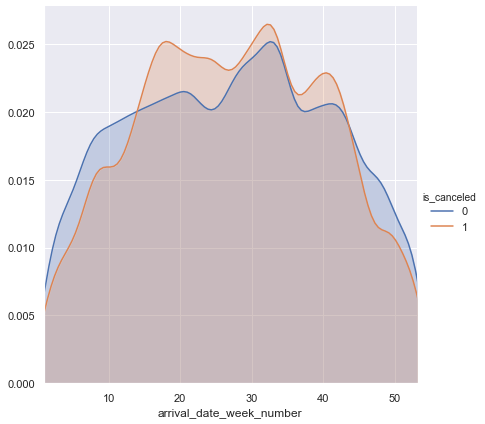

In [19]:
# Density Curve for arrival week number by cancellation
plt.figure(figsize = (20,10))
sns.FacetGrid(dataset, hue = 'is_canceled',height = 6, xlim=[1,53]).map(sns.kdeplot, 'arrival_date_week_number',shade=True).add_legend()

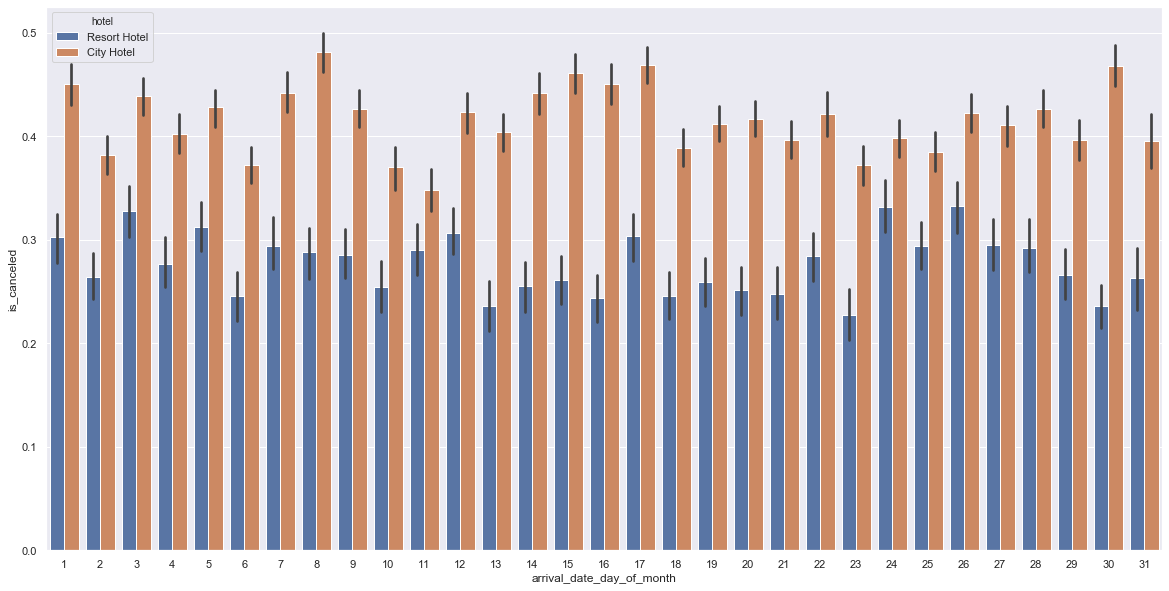

In [20]:
# bar chart for arrival date of month
plt.figure(figsize=(20,10))
sns.barplot(x='arrival_date_day_of_month', y='is_canceled', hue='hotel',data=dataset)

- flucutations for the arrival day of month.

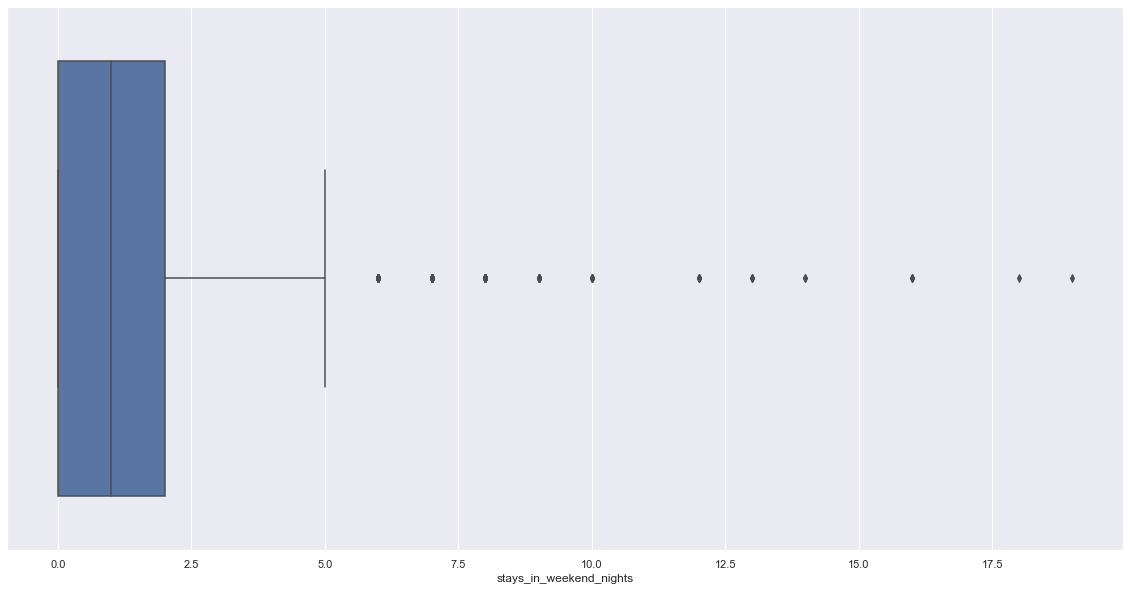

In [21]:
# box plot of stays on weekend nights
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['stays_in_weekend_nights'])

- outlikers are larger than 5
- majority is smaller than 2.5 days (i.e. around one weekend)

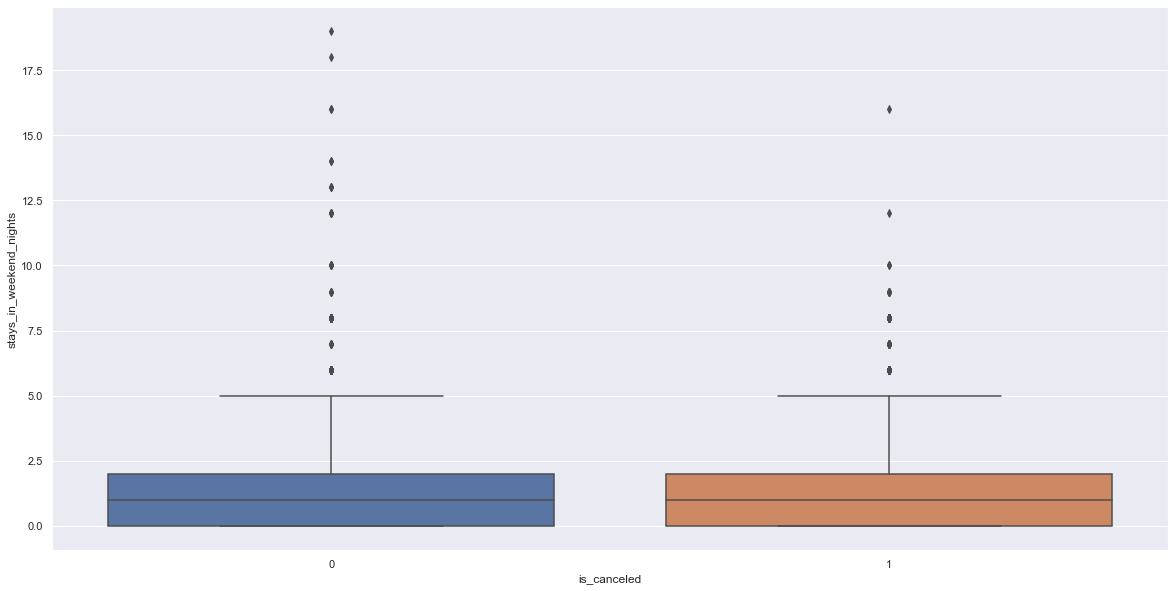

In [22]:
# box plot of stays on weekend nights by is_canceled
plt.figure(figsize = (20,10))
sns.boxplot(x=dataset['is_canceled'],y=dataset['stays_in_weekend_nights'])

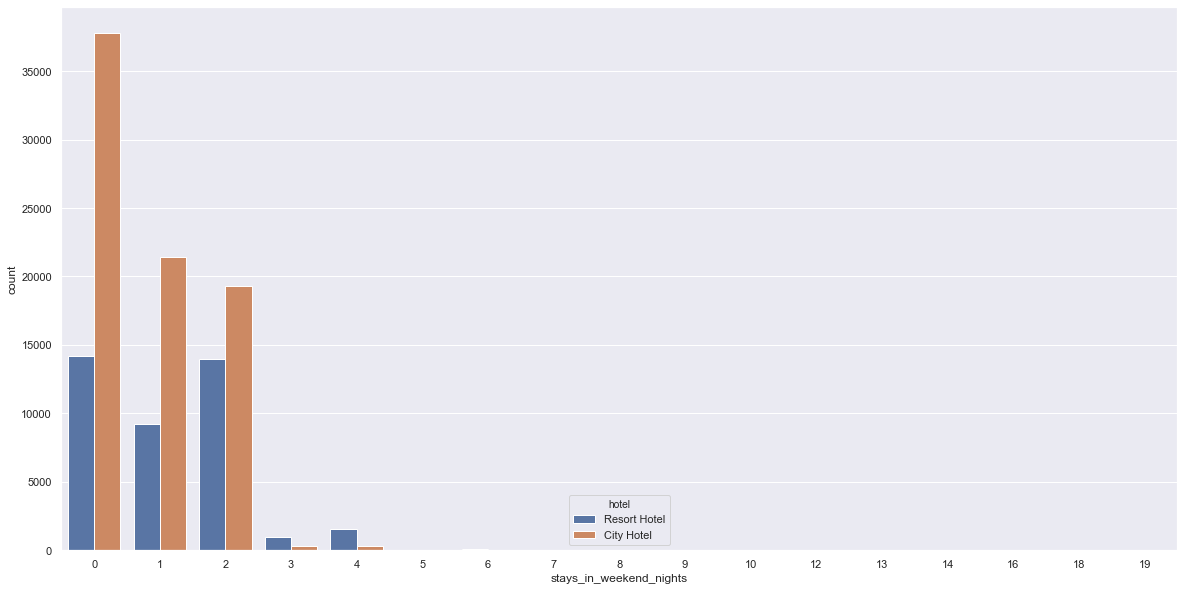

In [23]:
plt.figure(figsize = (20,10))
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=dataset)

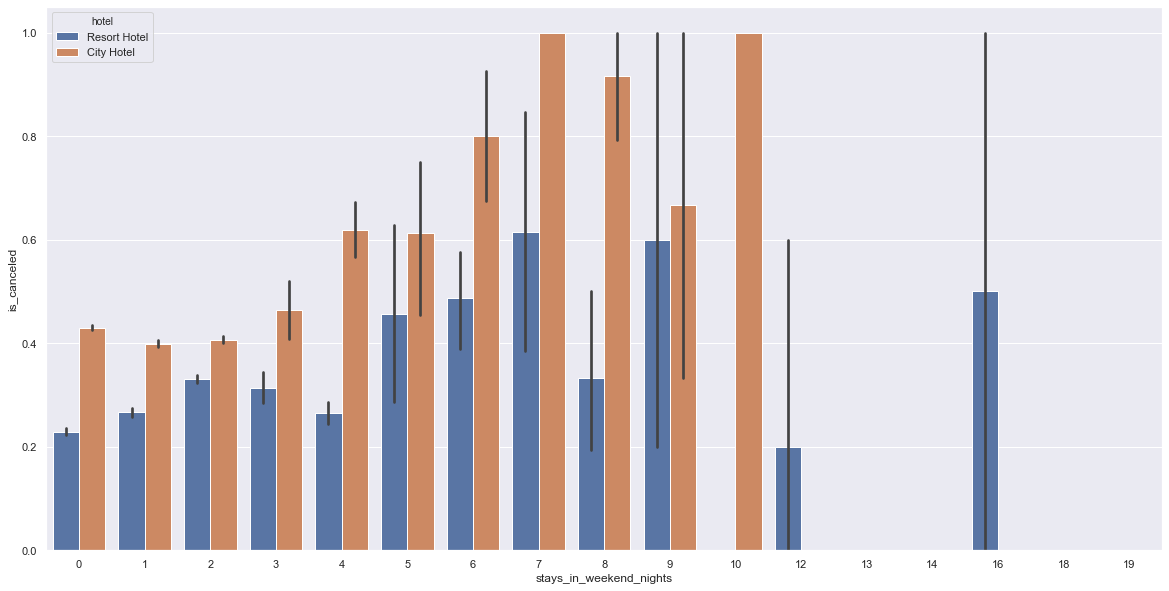

In [24]:
# bar chart for stays on weekend nights
plt.figure(figsize=(20,10))
sns.barplot(x='stays_in_weekend_nights', y='is_canceled', hue='hotel', data=dataset)

- The cancellation rates tend to increase as the increase in weekend nights

## Feature Engineering

In [25]:
# to check the feature types
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [26]:
# change hotels to 0 and 1 (City Hotel: 1, Resort Hotel: 0)
dataset['hotel'] = dataset.hotel.replace(['Resort Hotel','City Hotel'],[0,1] )

In [27]:
# change arrival date month to 1 to 12
dataset['arrival_date_month'] = dataset.arrival_date_month.replace(month,np.arange(1,13))

### Optional: Data transformation and handle outliers

In [28]:
from scipy import stats

In [29]:
# lead time
dataset['lead_time'].skew()

1.3465498727254268

In [30]:
dataset['log_lead'] = dataset['lead_time'].map(lambda i: np.log(i) if i > 0 else 0)
dataset['log_lead'].skew()

-0.903993835862541

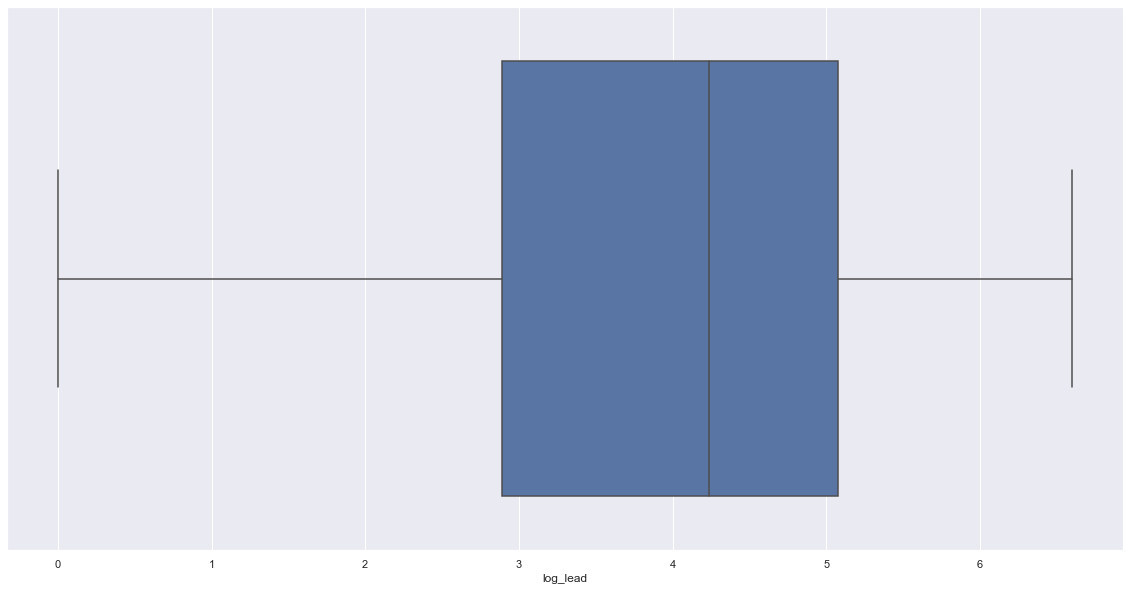

In [31]:
plt.figure(figsize = (20,10))
sns.boxplot(dataset['log_lead'])

In [32]:
# stays_in_weekend_nights
dataset['stays_in_weekend_nights'] = np.where(dataset['stays_in_weekend_nights'] > 5, 5, dataset['stays_in_weekend_nights'])

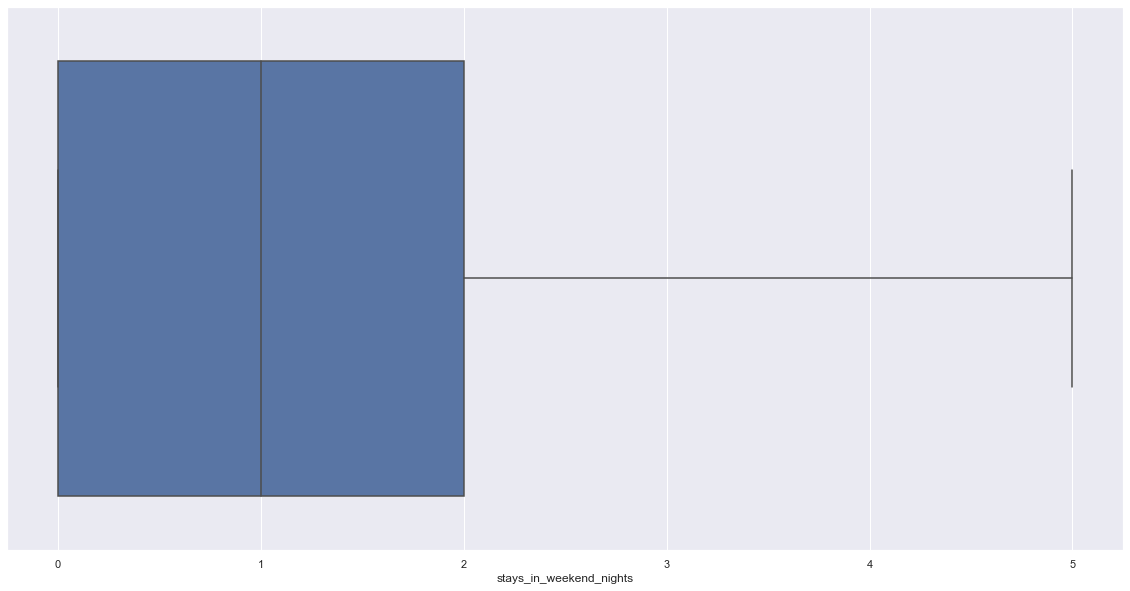

In [33]:
plt.figure(figsize = (20,10))
sns.boxplot(dataset['stays_in_weekend_nights'])

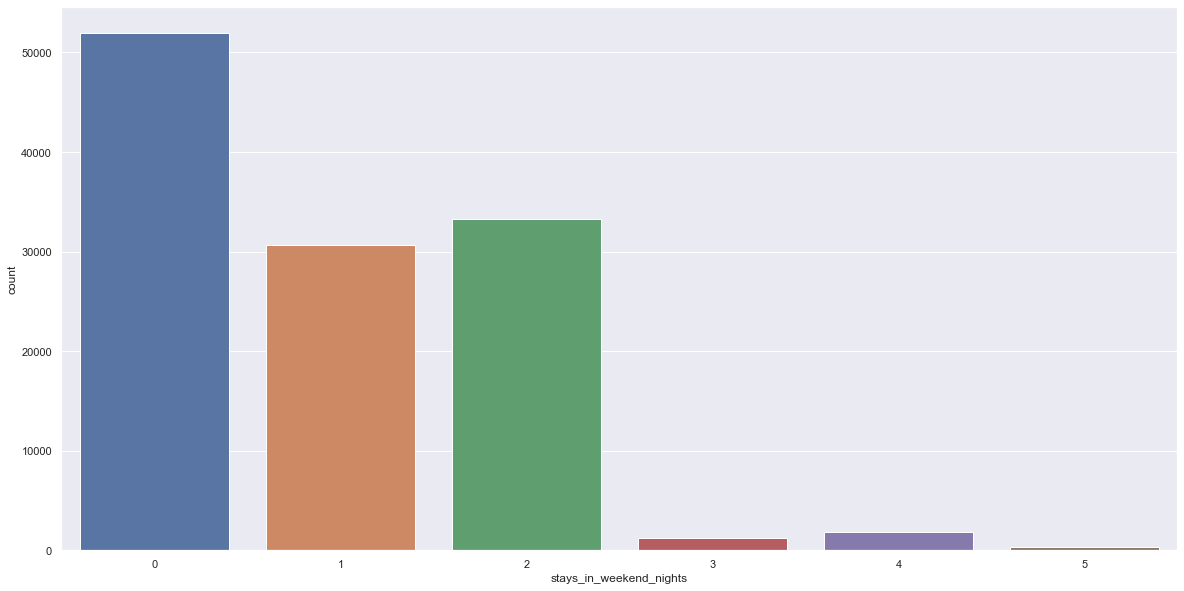

In [34]:
plt.figure(figsize = (20,10))
sns.countplot(dataset['stays_in_weekend_nights'])

## Correlations (after feature engineering)

In [35]:
# look at the correlations among columns
data = dataset.copy()
data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,log_lead
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.188959,-0.234020,-0.013183,...,-0.012292,-0.004441,-0.072820,-0.790232,-0.364093,0.072432,0.096719,-0.218873,-0.043390,0.108615
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.002844,0.024765,0.060017,...,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658,0.319718
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.088056,0.165799,0.119519,...,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712,0.787018
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021495,0.030883,0.029635,...,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531,0.059237
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.021979,0.019212,0.028534,...,0.037479,-0.021640,0.004809,-0.030534,-0.074658,0.019045,0.079315,0.000257,0.028026,0.105503
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.021863,0.015558,0.025909,...,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149,0.101695
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.015149,-0.028174,-0.001566,...,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,0.009306
stays_in_weekend_nights,-0.188959,-0.002844,0.088056,0.021495,0.021979,0.021863,-0.015149,1.000000,0.460587,0.096942,...,-0.012790,-0.043881,0.052436,0.142460,0.069203,-0.055222,0.054905,-0.018449,0.074573,0.195073
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.460587,1.000000,0.092976,...,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192,0.271794
adults,-0.013183,0.060017,0.119519,0.029635,0.028534,0.025909,-0.001566,0.096942,0.092976,1.000000,...,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884,0.182810


In [36]:
# look at the correlations with is_canceled
data.corr()['is_canceled'].sort_values()

total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
booking_changes                  -0.144381
is_repeated_guest                -0.084793
agent                            -0.083114
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
company                          -0.020642
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.002844
children                          0.005048
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
adults                            0.060017
previous_cancellations            0.110133
hotel                             0.136531
lead_time                         0.293123
log_lead                          0.319718
is_canceled                       1.000000
Name: is_ca